# Análises Exploratórias em um arquivo sobre jogos, disponivel no site Kaggle

In [94]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
dados = pd.DataFrame(pd.read_csv('C:/Users/vitor/Estudos/vgsales.csv'))
dados

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [95]:
dados.rename(columns = {'Name':'Nome','Platform':'Plataforma','Year':'Ano','Genre':'Genero','Publisher':'Desenvolvedora',
                       'Global_Sales':'Vendas_Globais','Other_Sales':'Outras_Vendas'}, inplace = True)
dados.head(5)

,Rank,Nome,Plataforma,Ano,Genero,Desenvolvedora,NA_Sales,EU_Sales,JP_Sales,Outras_Vendas,Vendas_Globais
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [96]:
dados['Vendas_Globais'] = np.array(dados['Vendas_Globais']).astype(int)
dados['Ano'] = np.array(dados['Ano']).astype(int)
dados['NA_Sales'] = np.array(dados['NA_Sales']).astype(int)
dados['EU_Sales'] = np.array(dados['EU_Sales']).astype(int)
dados['EU_Porcentagem'] = (dados['Vendas_Globais']/dados['EU_Sales']).round(2)

In [97]:
dados.head(5)

,Rank,Nome,Plataforma,Ano,Genero,Desenvolvedora,NA_Sales,EU_Sales,JP_Sales,Outras_Vendas,Vendas_Globais,EU_Porcentagem
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41,29,3.77,8.46,82,2.83
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29,3,6.81,0.77,40,13.33
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15,12,3.79,3.31,35,2.92
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15,11,3.28,2.96,33,3.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11,8,10.22,1.00,31,3.88


In [98]:
dados.dtypes

Rank                int64
Nome               object
Plataforma         object
Ano                 int32
Genero             object
Desenvolvedora     object
NA_Sales            int32
EU_Sales            int32
JP_Sales          float64
Outras_Vendas     float64
Vendas_Globais      int32
EU_Porcentagem    float64
dtype: object

In [99]:
dados.Genero.value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genero, dtype: int64

In [115]:
df1 = dados[(dados.Genero == 'Action') & (dados.Ano >= 2000)]
df2 = dados[(dados.Genero == 'Sports') & (dados.Ano >= 2000)]

Text(0.5, 1.0, 'Quantidade mais vendidas de jogos de AÇÃO nos EUA a partir do ano 2000')

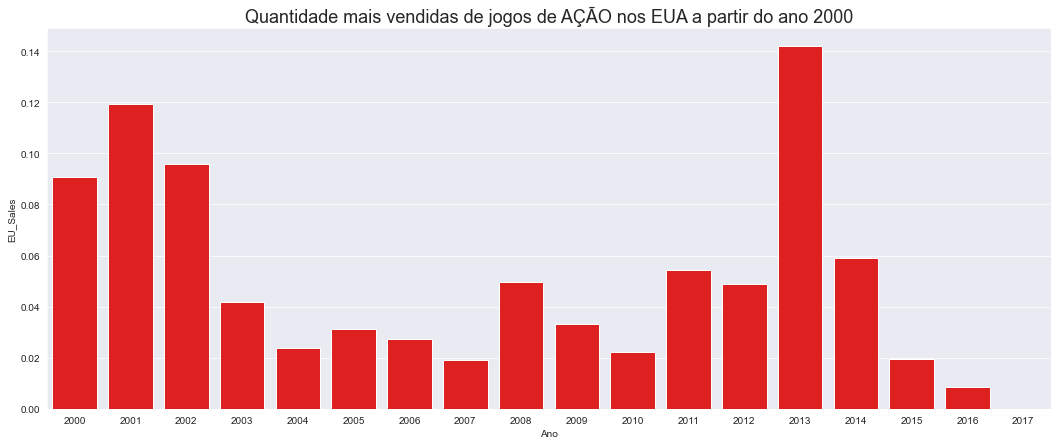

In [131]:
ax = sns.barplot(df.Ano, df.EU_Sales,ci = None, color = 'red')
ax.figure.set_size_inches(18,7)
ax.set_title('Quantidade mais vendidas de jogos de AÇÃO nos EUA a partir do ano 2000', fontsize = 18)

Text(0.5, 1.0, 'Quantidade mais vendidas de jogos de Esporte nos EUA a partir do ano 2000')

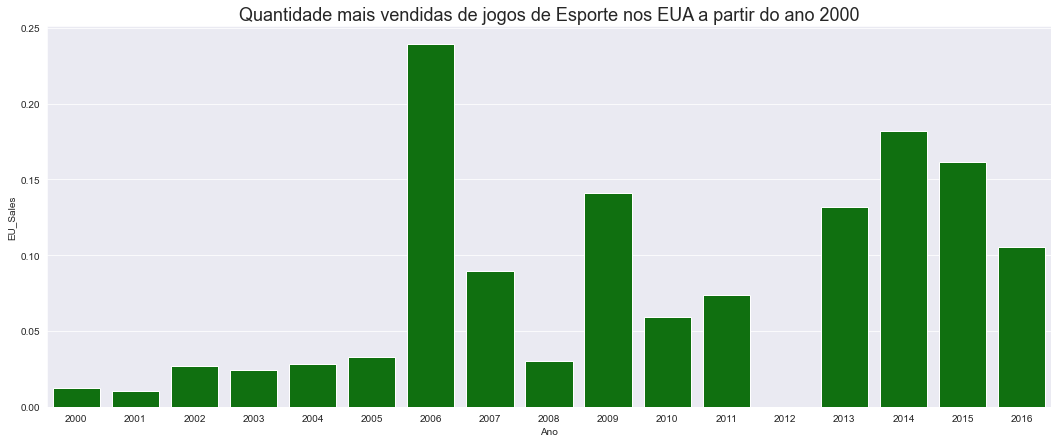

In [130]:
ax = sns.barplot(df2.Ano, df2.EU_Sales,ci = None, color = 'green')
ax.figure.set_size_inches(18,7)
ax.set_title('Quantidade mais vendidas de jogos de Esporte nos EUA a partir do ano 2000', fontsize = 18)

In [133]:
dados.head(5)

,Rank,Nome,Plataforma,Ano,Genero,Desenvolvedora,NA_Sales,EU_Sales,JP_Sales,Outras_Vendas,Vendas_Globais,EU_Porcentagem
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41,29,3.77,8.46,82,2.83
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29,3,6.81,0.77,40,13.33
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15,12,3.79,3.31,35,2.92
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15,11,3.28,2.96,33,3.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11,8,10.22,1.00,31,3.88


In [135]:
len(dados)

16598

In [181]:
pizza = pd.DataFrame(dados.Genero.value_counts()).reset_index()
pizza = pizza.rename(columns={'index':'Genero','Genero':'Quantidade'})

Index(['Genero', 'Quantidade'], dtype='object')

In [182]:
pizza

,Genero,Quantidade
0,Action,3316
1,Sports,2346
2,Misc,1739
3,Role-Playing,1488
4,Shooter,1310
5,Adventure,1286
6,Racing,1249
7,Platform,886
8,Simulation,867
9,Fighting,848


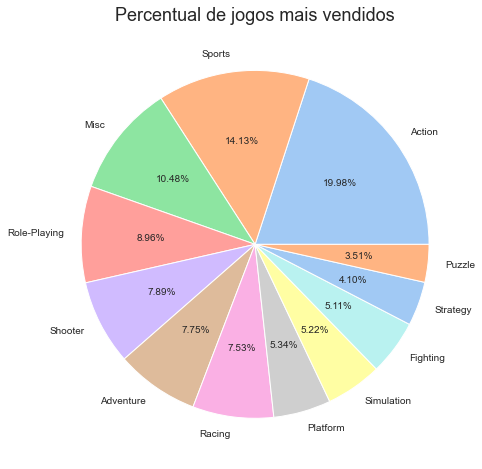

In [201]:
plt.figure(figsize = (8,8))
plt.pie(pizza.Quantidade, labels = pizza.Genero, autopct='%.2f%%')
plt.title('Percentual de jogos mais vendidos', fontsize = 18)
plt.show()

In [33]:
genero_vendas = dados.groupby('Genero')['Vendas_Globais'].sum()

In [34]:
genero_vendas

Genero
Action          1751.18
Adventure        239.04
Fighting         448.91
Misc             809.96
Platform         831.37
Puzzle           244.95
Racing           732.04
Role-Playing     927.37
Shooter         1037.37
Simulation       392.20
Sports          1330.93
Strategy         175.12
Name: Vendas_Globais, dtype: float64

In [35]:
q1 = dados[(dados.Genero == 'Action')]
round(sum(q1.Vendas_Globais))

1751

In [36]:
dados2 = pd.DataFrame(genero_vendas)
dados2.reset_index(inplace = True)
dados2.columns
dados2 = dados2.sort_values(by = 'Vendas_Globais')

<BarContainer object of 12 artists>

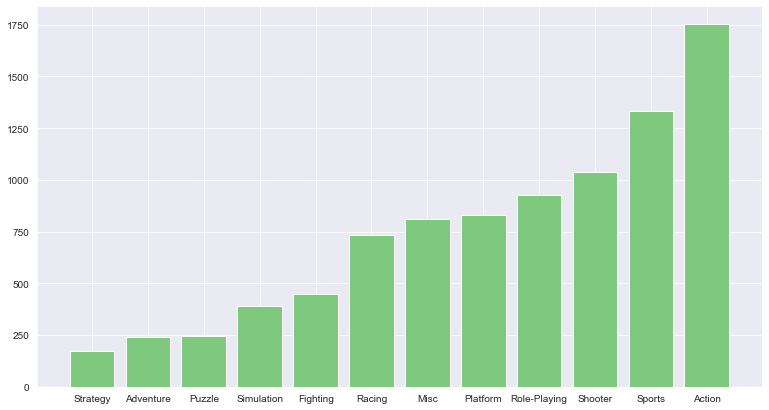

In [37]:
plt.figure(figsize = (13,7))
plt.bar(dados2.Genero,dados2.Vendas_Globais)

Text(0.5, 1.0, 'Quantidade mais vendidas de jogos por gênero')

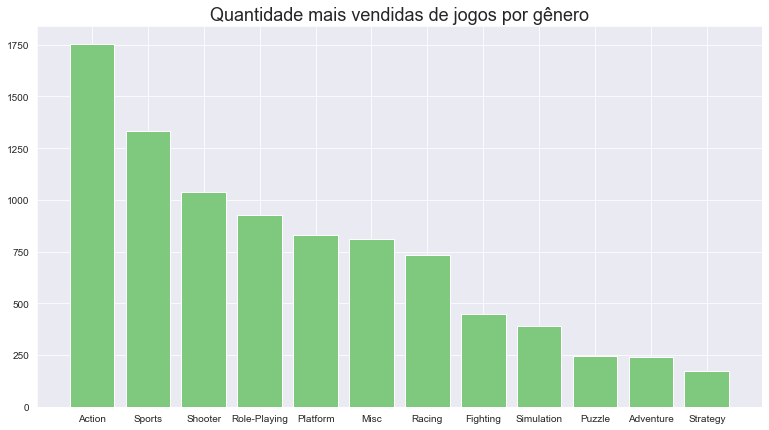

In [38]:
dados2 = dados2.sort_values(by = 'Vendas_Globais',ascending = False)
plt.figure(figsize = (13,7))
plt.bar(dados2.Genero, dados2.Vendas_Globais)
plt.title('Quantidade mais vendidas de jogos por gênero', fontsize = 18)

Text(0.5, 1.0, 'Quantidade mais vendidas de jogos por gênero')

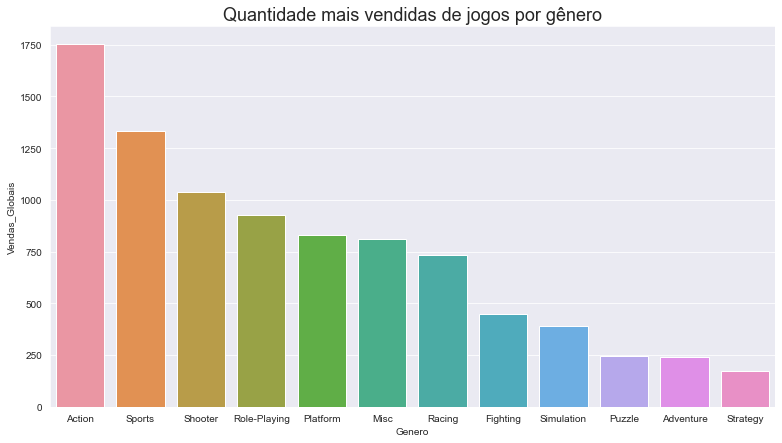

In [39]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.barplot(dados2.Genero, dados2.Vendas_Globais)
ax.figure.set_size_inches(13,7)
ax.set_title('Quantidade mais vendidas de jogos por gênero', fontsize = 18)

In [40]:
dados_por_genero = dados.groupby('Genero')
table = pd.DataFrame({'Soma das Vendas': dados_por_genero.Vendas_Globais.sum(),' Qtd de Desenvolvedoras': dados_por_genero.Desenvolvedora.count(), 'Qtd de Plataformas': dados_por_genero.Plataforma.count()}).sort_values(by = 'Soma das Vendas', ascending = False).reset_index()
table

,Genero,Soma das Vendas,Qtd de Desenvolvedoras,Qtd de Plataformas
0,Action,1751.18,3309,3316
1,Sports,1330.93,2343,2346
2,Shooter,1037.37,1308,1310
3,Role-Playing,927.37,1486,1488
4,Platform,831.37,884,886
5,Misc,809.96,1712,1739
6,Racing,732.04,1248,1249
7,Fighting,448.91,846,848
8,Simulation,392.20,863,867
9,Puzzle,244.95,581,582


In [41]:
table2 = pd.DataFrame(dados.Desenvolvedora.value_counts().head(16)).reset_index()
table2.rename(columns = {'index':'Desenvolvedora','Desenvolvedora':'Quantidade'},inplace = True)
table2

,Desenvolvedora,Quantidade
0,Electronic Arts,1351
1,Activision,975
2,Namco Bandai Games,932
3,Ubisoft,921
4,Konami Digital Entertainment,832
5,THQ,715
6,Nintendo,703
7,Sony Computer Entertainment,683
8,Sega,639
9,Take-Two Interactive,413


In [42]:
query1 = dados[(dados.Desenvolvedora == 'Electronic Arts')]
query1

,Rank,Nome,Plataforma,Ano,Genero,Desenvolvedora,NA_Sales,EU_Sales,JP_Sales,Outras_Vendas,Vendas_Globais
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
82,83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
99,100,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34
...,...,...,...,...,...,...,...,...,...,...,...
16339,16342,Command & Conquer Renegade,PC,2002.0,Shooter,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16384,16387,Poker for Dummies,PC,2008.0,Misc,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16413,16416,The Godfather (JP sales),X360,2006.0,Action,Electronic Arts,0.00,0.00,0.01,0.00,0.01
16539,16542,Spore Galactic Adventures,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01


In [43]:
query1.Genero.value_counts()

Sports          561
Action          183
Racing          159
Shooter         139
Simulation      116
Misc             46
Fighting         39
Strategy         37
Role-Playing     35
Platform         16
Adventure        13
Puzzle            7
Name: Genero, dtype: int64

In [44]:
query1.Genero.value_counts()

Sports          561
Action          183
Racing          159
Shooter         139
Simulation      116
Misc             46
Fighting         39
Strategy         37
Role-Playing     35
Platform         16
Adventure        13
Puzzle            7
Name: Genero, dtype: int64

In [45]:
query1.groupby('Genero')['Vendas_Globais'].mean().round(2).sort_values(ascending = False)

Genero
Shooter         1.14
Role-Playing    1.01
Racing          0.92
Sports          0.86
Fighting        0.80
Simulation      0.77
Puzzle          0.65
Action          0.63
Misc            0.54
Platform        0.41
Strategy        0.38
Adventure       0.37
Name: Vendas_Globais, dtype: float64

In [46]:
dados2 = pd.DataFrame(genero_vendas)

In [47]:
a = pd.DataFrame(dados.Genero.value_counts())
a.sort_values(by = 'Genero', ascending = False, inplace = True)
a.reset_index(inplace = True)
a.rename(columns = {'index':'Genero','Genero':'qtd'}, inplace = True)
a

,Genero,qtd
0,Action,3316
1,Sports,2346
2,Misc,1739
3,Role-Playing,1488
4,Shooter,1310
5,Adventure,1286
6,Racing,1249
7,Platform,886
8,Simulation,867
9,Fighting,848


In [48]:
b = pd.DataFrame(dados.Desenvolvedora.value_counts())
b.sort_values(by = 'Desenvolvedora', ascending = False, inplace = True)
b.reset_index(inplace = True)
b.rename(columns = {'index':'Desenvolvedora','Desenvolvedora':'Qtd'}, inplace = True)
b.head(12)

,Desenvolvedora,Qtd
0,Electronic Arts,1351
1,Activision,975
2,Namco Bandai Games,932
3,Ubisoft,921
4,Konami Digital Entertainment,832
5,THQ,715
6,Nintendo,703
7,Sony Computer Entertainment,683
8,Sega,639
9,Take-Two Interactive,413


In [49]:
len(dados.Desenvolvedora.value_counts())

578

In [50]:
b = dados[(dados.Genero == 'Action')]
b.Desenvolvedora.value_counts()

Activision             310
Namco Bandai Games     248
THQ                    194
Ubisoft                193
Electronic Arts        183
                      ... 
Activision Blizzard      1
Popcorn Arcade           1
Flashpoint Games         1
IE Institute             1
UFO Interactive          1
Name: Desenvolvedora, Length: 228, dtype: int64

In [51]:
c = dados[(dados.Genero == 'Sports')]
c.Desenvolvedora.value_counts()

Electronic Arts                 561
Konami Digital Entertainment    280
Take-Two Interactive            151
Activision                      144
Sega                            135
                               ... 
Vir2L Studios                     1
Kemco                             1
Level 5                           1
Kadokawa Shoten                   1
Electronic Arts Victor            1
Name: Desenvolvedora, Length: 163, dtype: int64

In [52]:
d = dados[(dados.Genero == 'Misc')]
d.Desenvolvedora.value_counts()

Ubisoft                        151
Sony Computer Entertainment    128
Activision                     103
Nintendo                       100
Namco Bandai Games              97
                              ... 
Media Entertainment              1
GungHo                           1
City Interactive                 1
Plenty                           1
GameTek                          1
Name: Desenvolvedora, Length: 210, dtype: int64

In [53]:
e = dados[(dados.Genero == 'Role-Playing')]
e.Desenvolvedora.value_counts()

Namco Bandai Games      151
Square Enix             129
Nintendo                106
Nippon Ichi Software     69
Sega                     64
                       ... 
Panther Software          1
Micro Cabin               1
Max Five                  1
5pb                       1
TopWare Interactive       1
Name: Desenvolvedora, Length: 158, dtype: int64

In [54]:
f = dados[(dados.Genero == 'Shooter')]
f.Desenvolvedora.value_counts()

Activision                     159
Electronic Arts                139
Ubisoft                         92
Take-Two Interactive            65
Sony Computer Entertainment     51
                              ... 
Bohemia Interactive              1
Graffiti                         1
Devolver Digital                 1
Jaleco                           1
Hasbro Interactive               1
Name: Desenvolvedora, Length: 150, dtype: int64

In [80]:
table3 = pd.DataFrame(a.Genero.head(5))
table3['Maior_Desenvolvedora'] = list(['Activision','Electronic Arts','Ubisoft','Namco Bandai Games','Activision'])
table3.rename(columns ={'Genero':'Maior_Genero'},inplace = True)
table3

,Maior_Genero,Maior_Desenvolvedora
0,Action,Activision
1,Sports,Electronic Arts
2,Misc,Ubisoft
3,Role-Playing,Namco Bandai Games
4,Shooter,Activision


In [86]:
dados.mean().round(2)

Rank              8300.61
Ano               2006.41
NA_Sales             0.26
EU_Sales             0.15
JP_Sales             0.08
Outras_Vendas        0.05
Vendas_Globais       0.54
dtype: float64

In [100]:
pd.crosstab(dados.Genero, dados.Plataforma)

Plataforma,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Genero,,,,,,,,,,,,,,,,,,,,,
Action,61,0,182,3,343,6,167,101,3,0,...,3,0,12,0,0,238,63,324,155,68
Adventure,2,1,37,11,240,5,38,20,2,0,...,26,0,4,1,0,84,3,47,26,12
Fighting,2,0,14,12,36,0,23,42,5,0,...,31,0,25,0,0,42,5,65,48,7
Misc,5,0,53,0,393,8,110,36,1,0,...,15,2,17,0,0,280,21,126,46,15
Platform,9,0,28,2,92,19,142,73,7,1,...,5,1,26,0,0,58,16,24,49,4
Puzzle,11,1,20,0,238,15,41,13,0,0,...,5,0,13,0,0,55,4,7,7,0
Racing,6,0,11,6,67,2,64,63,1,0,...,8,1,9,0,0,94,3,105,123,19
Role-Playing,0,0,86,4,200,21,73,27,3,0,...,17,1,50,0,4,35,6,76,23,13
Shooter,24,0,7,3,42,1,40,48,1,0,...,22,0,10,1,0,66,10,203,132,33
